<a href="https://colab.research.google.com/github/nanmaharaj/my-deeplearning-projects/blob/main/flower_img_data_aug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

228813984/228813984 [==============================] - 1s 0us/step


In [3]:
data_dir

'./datasets/flower_photos'

In [4]:
import pathlib
data_dir=pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [5]:
len(list(data_dir.glob('*/*.jpg')))

3670

In [6]:
roses=list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/14810868100_87eb739f26_m.jpg'),
 PosixPath('datasets/flower_photos/roses/3500121696_5b6a69effb_n.jpg'),
 PosixPath('datasets/flower_photos/roses/7186509956_c37c02fb43_n.jpg'),
 PosixPath('datasets/flower_photos/roses/909277823_e6fb8cb5c8_n.jpg'),
 PosixPath('datasets/flower_photos/roses/9337528427_3d09b7012b.jpg')]

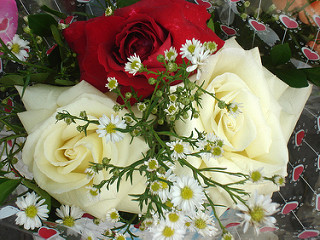

In [7]:
PIL.Image.open(str(roses[10]))

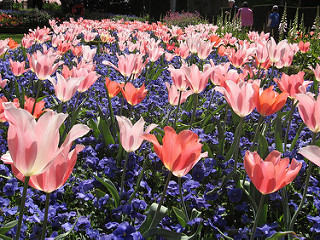

In [8]:
tulips=list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[10]))

In [9]:
flowers_images_dict={
    'roses':list(data_dir.glob('roses/*')),
    'daisy':list(data_dir.glob('daisy/*')),
    'dandelion':list(data_dir.glob('dandelion/*')),
    'sunflowers':list(data_dir.glob('sunflowers/*')),
    'tulips':list(data_dir.glob('tulips/*'))
}

In [10]:
flowers_labels_dict={
    'roses':0,
    'daisy':1,
    'dandelion':2,
    'sunflowers':3,
    'tulips':4
}

In [11]:
img=cv2.imread(str(flowers_images_dict['roses'][0]))
#img
img.shape
#converts image into a numpy array

(240, 178, 3)

In [12]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [13]:
X, y=[], []

for flower_name, images in flowers_images_dict.items():
  for image in images:
    img=cv2.imread(str(image))
    resized_img=cv2.resize(img,(180,180))
    X.append(resized_img)
    y.append(flowers_labels_dict[flower_name])

In [14]:
X=np.array(X)
y=np.array(y)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, random_state=0)

In [16]:
len(X_train), len(X_test)

(2752, 918)

In [17]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [18]:
model=Sequential([
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(5)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#you can directly pass the logits (raw output values) from your model without applying a softmax activation function.
#This is particularly useful when efficiency is a concern, as it avoids the computation of the softmax values during training.
# The function internally applies the softmax activation function and computes the cross-entropy loss between the true labels and the logits.

model.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
86/86 [==============================] - 7s 19ms/step - loss: 1.3290 - accuracy: 0.4462
Epoch 2/10
86/86 [==============================] - 2s 19ms/step - loss: 0.9845 - accuracy: 0.6076
Epoch 3/10
86/86 [==============================] - 2s 20ms/step - loss: 0.7923 - accuracy: 0.6977
Epoch 4/10
86/86 [==============================] - 2s 19ms/step - loss: 0.5558 - accuracy: 0.7965
Epoch 5/10
86/86 [==============================] - 2s 21ms/step - loss: 0.3287 - accuracy: 0.8892
Epoch 6/10
86/86 [==============================] - 2s 21ms/step - loss: 0.1866 - accuracy: 0.9353
Epoch 7/10
86/86 [==============================] - 2s 19ms/step - loss: 0.1215 - accuracy: 0.9651
Epoch 8/10
86/86 [==============================] - 2s 20ms/step - loss: 0.0738 - accuracy: 0.9793
Epoch 9/10
86/86 [==============================] - 2s 20ms/step - loss: 0.0323 - accuracy: 0.9938
Epoch 10/10
86/86 [==============================] - 2s 20ms/step - loss: 0.0105 - accuracy: 0.9993


In [19]:
 model.evaluate(X_test_scaled, y_test)

29/29 [==============================] - 1s 20ms/step - loss: 2.2644 - accuracy: 0.6275


[2.264385938644409, 0.6274510025978088]

In [20]:
predictions=model.predict(X_test_scaled)
predictions

29/29 [==============================] - 0s 8ms/step


array([[ -6.927606  ,   8.770367  ,  11.947288  ,  -6.668901  ,
         -5.5556493 ],
       [  0.85271084,  -2.8972661 ,   4.52812   ,   8.373998  ,
         -0.90607685],
       [ -9.165313  ,   4.6441035 ,  13.945855  ,   5.413091  ,
         -6.4506354 ],
       ...,
       [  0.6913065 ,  -4.0730753 ,  -1.4714867 ,  12.78679   ,
          5.9014907 ],
       [ 12.090457  ,  -1.8241768 , -10.247711  ,  -3.3439062 ,
          8.067676  ],
       [ -7.9037433 ,   1.6543305 ,   3.9979963 ,  14.388349  ,
          1.9098195 ]], dtype=float32)

In [48]:
score=tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([6.0952225e-09, 4.0043525e-02, 9.5995641e-01, 7.8948483e-09,
       2.4033797e-08], dtype=float32)>

In [49]:
np.argmax(score),y_test[0]

(2, 1)

In [52]:
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(180, 180, 3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1)
])


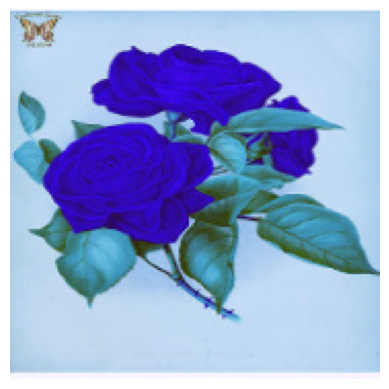

In [53]:
plt.axis('off')
plt.imshow(X[0])

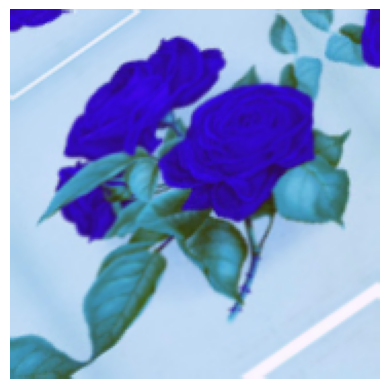

In [54]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [57]:
model=Sequential([
    data_augmentation,
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),

    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(5)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=10)

#data_augmentation and Dropout layer added

Epoch 1/10
86/86 [==============================] - 4s 29ms/step - loss: 1.3891 - accuracy: 0.3957
Epoch 2/10
86/86 [==============================] - 3s 29ms/step - loss: 1.0907 - accuracy: 0.5658
Epoch 3/10
86/86 [==============================] - 2s 29ms/step - loss: 0.9790 - accuracy: 0.6014
Epoch 4/10
86/86 [==============================] - 2s 27ms/step - loss: 0.9194 - accuracy: 0.6435
Epoch 5/10
86/86 [==============================] - 2s 27ms/step - loss: 0.8443 - accuracy: 0.6606
Epoch 6/10
86/86 [==============================] - 2s 27ms/step - loss: 0.8029 - accuracy: 0.6879
Epoch 7/10
86/86 [==============================] - 3s 29ms/step - loss: 0.7724 - accuracy: 0.6937
Epoch 8/10
86/86 [==============================] - 2s 29ms/step - loss: 0.7508 - accuracy: 0.6991
Epoch 9/10
86/86 [==============================] - 2s 27ms/step - loss: 0.7010 - accuracy: 0.7304
Epoch 10/10
86/86 [==============================] - 2s 27ms/step - loss: 0.6757 - accuracy: 0.7409


In [58]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 1s 14ms/step - loss: 0.7740 - accuracy: 0.7059


[0.7739530801773071, 0.7058823704719543]